In [117]:
import numpy as np
import pandas as pd
import sns as sns
from pandas.plotting import scatter_matrix

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [65]:
df = pd.read_csv("../data/adult.csv")
df = df.replace("?", np.nan)
df = df.dropna()
df = df.replace("Married-civ-spouse", "Married")
df

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [14]:
df.value_counts("sex")

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [18]:
df[df["sex"] == "Male"]["age"].mean()

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [27]:
df[df["native-country"] == "Poland"]["native-country"].count() / df["native-country"].count() * 100

0.18762899493401713

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [33]:
rich_people = df[df["salary"] == ">50K"]
rich_people["age"].mean()

44.24984058155847

In [32]:
rich_people["age"].std()

10.519027719851826

In [34]:
people_with_work = df[df["salary"] == "<=50K"]
people_with_work["age"].mean()

36.78373786407767

In [35]:
people_with_work["age"].std()

14.02008849082488

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [43]:
people_without_education = df[df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]
people_without_education[people_without_education["salary"] == ">50K"]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303
11,11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,>50K,279
14,14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,NaN,>50K,325
19,19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,United-States,>50K,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32536,32536,34,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K,260
32538,32538,38,Private,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K,248
32539,32539,71,NaN,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,10,United-States,>50K,62
32545,32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K,122


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [55]:
df["age"].groupby(df["education"]).describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [75]:
married_men = df[df["marital-status"] == "Married"]
not_married_men = df[df["marital-status"] != "Married"]
married_men[married_men["salary"] == ">50K"]["salary"].count() / married_men["salary"].count() * 100

45.495911837895484

In [74]:
not_married_men[not_married_men["salary"] == ">50K"]["salary"].count() / not_married_men["salary"].count() * 100

6.889482512269367

Married men earn more


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [82]:
max_hours = df["hours-per-week"].max()
df[df["hours-per-week"] == max_hours].count()

Unnamed: 0        78
age               78
workclass         78
education         78
marital-status    78
occupation        78
relationship      78
race              78
sex               78
hours-per-week    78
native-country    78
salary            78
salary K$         78
dtype: int64

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

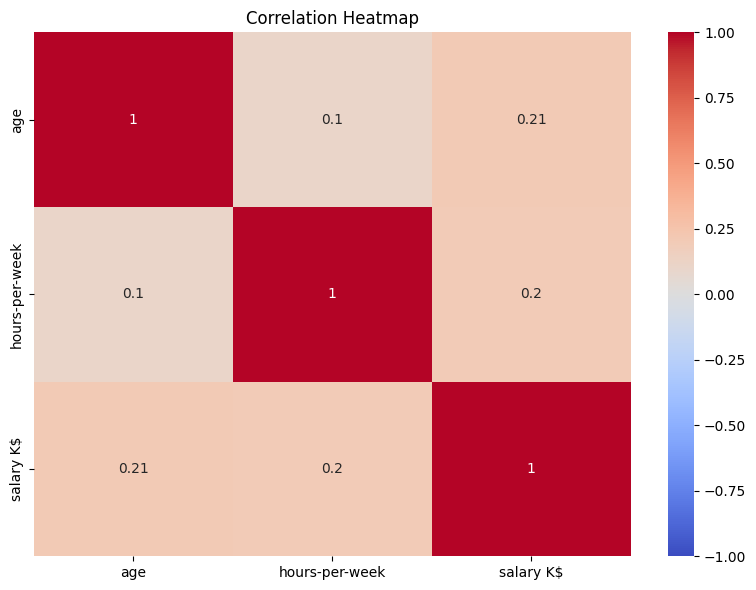

In [127]:
from matplotlib import pyplot as plt
import seaborn as sns

columns_of_interest = ["age", "hours-per-week", "salary K$"]
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Add title and adjust layout
plt.title("Correlation Heatmap")
plt.tight_layout()

# Display the plot
plt.show()